# H2o---AutoML

# Importing the libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn.csv to Churn.csv


Automation of ML Starts from here


In [ ]:
!nvidia-smi

Mon Jul  6 06:13:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [ ]:
!pip install h2o

     |████████████████████████████████| 128.4MB 112kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.6-py2.py3-none-any.whl size=128412300 sha256=f9c79154a66038a46a79a3ff529078479fa4fd48e005174247afe9d506f7305f
  Stored in directory: /root/.cache/pip/wheels/de/4c/dd/4813e95c4b5328b4de2e2e1aa56ca66a547f45d11fe47c3c8a
Successfully built h2o


In [ ]:
import h2o
h2o.init()
from h2o.automl import H2OAutoML

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsi42w1s9
  JVM stdout: /tmp/tmpsi42w1s9/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsi42w1s9/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_nmvt50
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
bank_data = h2o.import_file('Churn.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
bank_data.describe()

Rows:10000
Cols:14




,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
type,int,int,enum,int,enum,enum,int,int,real,int,int,int,real,enum
mins,1.0,15565701.0,,350.0,,,18.0,0.0,0.0,1.0,0.0,0.0,11.58,
mean,5000.5,15690940.569400007,,650.5287999999998,,,38.92179999999999,5.012800000000001,76485.889288,1.5302000000000007,0.7055,0.5151,100090.23988099997,
maxs,10000.0,15815690.0,,850.0,,,92.0,10.0,250898.09,4.0,1.0,1.0,199992.48,
sigma,2886.8956799071675,71936.18612274893,,96.65329873613037,,,10.487806451704607,2.8921743770496837,62397.40520238596,0.5816543579989908,0.4558404644751334,0.49979692845891893,57510.492817698156,
zeros,0,0,,0,,,0,413,3617,0,2945,4849,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.0,1.0,1.0,1.0,101348.88,Yes
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,No
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.8,3.0,1.0,0.0,113931.57,Yes


In [ ]:
bank_data.types

{'Age': 'int',
 'Balance': 'real',
 'CreditScore': 'int',
 'CustomerId': 'int',
 'EstimatedSalary': 'real',
 'Exited': 'enum',
 'Gender': 'enum',
 'Geography': 'enum',
 'HasCrCard': 'int',
 'IsActiveMember': 'int',
 'NumOfProducts': 'int',
 'RowNumber': 'int',
 'Surname': 'enum',
 'Tenure': 'int'}

In [ ]:
train, valid = bank_data.split_frame(ratios = [.8], seed = 1234)

In [ ]:
train

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,Yes
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,No
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,Yes
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,No
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,Yes
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,No
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,Yes
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,No
11,1.57678e+07,Bearce,528,France,Male,31,6,102017,2,0,0,80181.1,No
12,1.57372e+07,Andrews,497,Spain,Male,24,3,0,2,1,0,76390,No


In [ ]:
y = 'Exited'
x = bank_data.columns
x.remove(y)
x.remove("RowNumber")
x.remove("CustomerId")
x.remove("Surname")

In [ ]:
aml = H2OAutoML(max_models=20, seed = 10, balance_classes=True, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity = "info", nfolds=0)

In [ ]:
!nvidia-smi

Mon Jul  6 06:14:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
aml.train(x=x,y=y,training_frame= train)

AutoML progress: |
06:14:12.747: Project: AutoML_20200706_61412742
06:14:12.749: Cross-validation disabled by user: no fold column nor nfolds > 1.
06:14:12.750: Setting stopping tolerance adaptively based on the training frame: 0.011154574690170912
06:14:12.750: Build control seed: 10
06:14:12.750: Since cross-validation is disabled, and none of validation frame and leaderboard frame were provided, automatically split the training data into training, validation and leaderboard frames in the ratio 80/10/10
06:14:12.869: training frame: Frame key: automl_training_py_2_sid_a2cb    cols: 14    rows: 6411  chunks: 8    size: 443106  checksum: 278032525951637467
06:14:12.882: validation frame: Frame key: automl_validation_py_2_sid_a2cb    cols: 14    rows: 833  chunks: 8    size: 272982  checksum: 9144130426171584107
06:14:12.894: leaderboard frame: Frame key: automl_leaderboard_py_2_sid_a2cb    cols: 14    rows: 793  chunks: 8    size: 271776  checksum: 8837832097638766153
06:14:12.894: ble

In [ ]:
lb = aml.leaderboard

In [ ]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_20200706_061412,0.895204,0.273388,0.731893,0.211877,0.28305,0.0801174
XGBoost_grid__1_AutoML_20200706_061412_model_5,0.891591,0.285411,0.728802,0.207604,0.291532,0.084991
GBM_4_AutoML_20200706_061412,0.89118,0.280591,0.707636,0.222132,0.287677,0.0827581
DRF_1_AutoML_20200706_061412,0.890032,0.333122,0.696657,0.211308,0.298715,0.0892305
GBM_5_AutoML_20200706_061412,0.888613,0.284034,0.70679,0.23894,0.290336,0.0842951
XGBoost_grid__1_AutoML_20200706_061412_model_1,0.886508,0.284736,0.731456,0.206749,0.288782,0.0833949
XGBoost_grid__1_AutoML_20200706_061412_model_3,0.885348,0.291443,0.713723,0.177885,0.294973,0.0870089
GBM_grid__1_AutoML_20200706_061412_model_3,0.884943,0.284693,0.719001,0.207509,0.287282,0.0825308
GBM_2_AutoML_20200706_061412,0.884335,0.285159,0.711494,0.180069,0.2898,0.0839838
GBM_grid__1_AutoML_20200706_061412_model_2,0.884031,0.284013,0.711395,0.23894,0.288538,0.083254


In [ ]:
prediction = aml.leader.predict(valid)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
prediction.head()

predict,No,Yes
No,0.942357,0.0576426
No,0.972027,0.0279725
No,0.992402,0.00759785
No,0.991316,0.00868424
Yes,0.690896,0.309104
No,0.983848,0.0161523
No,0.977442,0.0225576
No,0.98744,0.0125603
No,0.814371,0.185629
No,0.992912,0.00708835


In [ ]:
aml.leader.model_performance(valid)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.11663310656226676
RMSE: 0.3415158950360389
LogLoss: 0.38367417698776474
Mean Per-Class Error: 0.23108846540229533
AUC: 0.8466140521781484
AUCPR: 0.6789915477712745
Gini: 0.6932281043562969

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2021312853260965: 


,,No,Yes,Error,Rate
0,No,1329.0,206.0,0.1342,(206.0/1535.0)
1,Yes,147.0,281.0,0.3435,(147.0/428.0)
2,Total,1476.0,487.0,0.1798,(353.0/1963.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.202131,0.614208,231.0
1,max f2,0.083591,0.694282,309.0
2,max f0point5,0.467876,0.673077,129.0
3,max accuracy,0.467876,0.849720,129.0
4,max precision,0.958233,1.000000,0.0
5,max recall,0.008580,1.000000,393.0
6,max specificity,0.958233,1.000000,0.0
7,max absolute_mcc,0.301082,0.509224,186.0
8,max min_per_class_accuracy,0.119623,0.761682,281.0
9,max mean_per_class_accuracy,0.145654,0.768912,264.0



Gains/Lift Table: Avg response rate: 21.80 %, avg score: 16.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010188,0.911578,4.586449,4.586449,1.000000,0.936515,1.000000,0.936515,0.046729,0.046729,358.644860,358.644860,0.046729
1,2,0.020377,0.872920,4.357126,4.471787,0.950000,0.893322,0.975000,0.914918,0.044393,0.091121,335.712617,347.178738,0.090470
2,3,0.030056,0.837320,4.103665,4.353239,0.894737,0.851879,0.949153,0.894618,0.039720,0.130841,310.366454,335.323935,0.128887
3,4,0.040245,0.795919,4.127804,4.296167,0.900000,0.814977,0.936709,0.874455,0.042056,0.172897,312.780374,329.616704,0.169640
4,5,0.050433,0.746405,3.669159,4.169499,0.800000,0.770384,0.909091,0.853431,0.037383,0.210280,266.915888,316.949873,0.204417
5,6,0.100357,0.529163,3.229234,3.701753,0.704082,0.634881,0.807107,0.744710,0.161215,0.371495,222.923422,270.175293,0.346740
6,7,0.150280,0.378146,2.293224,3.233835,0.500000,0.444887,0.705085,0.645108,0.114486,0.485981,129.322430,223.383494,0.429304
7,8,0.200204,0.269896,1.965621,2.917588,0.428571,0.322143,0.636132,0.564572,0.098131,0.584112,96.562083,191.758817,0.490953
8,9,0.300051,0.150333,1.333814,2.390560,0.290816,0.201959,0.521222,0.443906,0.133178,0.717290,33.381413,139.055980,0.533576
9,10,0.399898,0.095892,0.936010,2.027386,0.204082,0.120837,0.442038,0.363242,0.093458,0.810748,-6.399008,102.738556,0.525406


In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids

['GBM_3_AutoML_20200706_061412',
 'XGBoost_grid__1_AutoML_20200706_061412_model_5',
 'GBM_4_AutoML_20200706_061412',
 'DRF_1_AutoML_20200706_061412',
 'GBM_5_AutoML_20200706_061412',
 'XGBoost_grid__1_AutoML_20200706_061412_model_1',
 'XGBoost_grid__1_AutoML_20200706_061412_model_3',
 'GBM_grid__1_AutoML_20200706_061412_model_3',
 'GBM_2_AutoML_20200706_061412',
 'GBM_grid__1_AutoML_20200706_061412_model_2',
 'GBM_1_AutoML_20200706_061412',
 'XGBoost_grid__1_AutoML_20200706_061412_model_6',
 'XGBoost_grid__1_AutoML_20200706_061412_model_2',
 'XRT_1_AutoML_20200706_061412',
 'XGBoost_3_AutoML_20200706_061412',
 'XGBoost_grid__1_AutoML_20200706_061412_model_4',
 'XGBoost_2_AutoML_20200706_061412',
 'GBM_grid__1_AutoML_20200706_061412_model_1',
 'XGBoost_1_AutoML_20200706_061412',
 'GLM_1_AutoML_20200706_061412']

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20200706_061412_model_5


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.07864909831774401
RMSE: 0.280444465657185
LogLoss: 0.26377951493532514
Mean Per-Class Error: 0.15344925632004502
AUC: 0.9274476191616371
AUCPR: 0.8221812221746366
Gini: 0.8548952383232742

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30667645656145537: 


,,No,Yes,Error,Rate
0,No,4676.0,425.0,0.0833,(425.0/5101.0)
1,Yes,305.0,1005.0,0.2328,(305.0/1310.0)
2,Total,4981.0,1430.0,0.1139,(730.0/6411.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.306676,0.733577,208.0
1,max f2,0.169364,0.777433,269.0
2,max f0point5,0.502277,0.776074,144.0
3,max accuracy,0.454095,0.895180,158.0
4,max precision,0.993518,1.000000,0.0
5,max recall,0.008770,1.000000,394.0
6,max specificity,0.993518,1.000000,0.0
7,max absolute_mcc,0.312766,0.662571,206.0
8,max min_per_class_accuracy,0.204434,0.842776,251.0
9,max mean_per_class_accuracy,0.232826,0.846551,238.0



Gains/Lift Table: Avg response rate: 20.43 %, avg score: 20.36 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010139,0.967956,4.893893,4.893893,1.000000,0.979667,1.000000,0.979667,0.049618,0.049618,389.389313,389.389313,0.049618
1,2,0.020122,0.947218,4.893893,4.893893,1.000000,0.957873,1.000000,0.968854,0.048855,0.098473,389.389313,389.389313,0.098473
2,3,0.030105,0.922770,4.893893,4.893893,1.000000,0.935987,1.000000,0.957955,0.048855,0.147328,389.389313,389.389313,0.147328
3,4,0.040087,0.897044,4.817426,4.874851,0.984375,0.910096,0.996109,0.946037,0.048092,0.195420,381.742605,387.485074,0.195224
4,5,0.050070,0.863506,4.817426,4.863402,0.984375,0.881591,0.993769,0.933188,0.048092,0.243511,381.742605,386.340158,0.243119
5,6,0.100140,0.637536,4.207833,4.535617,0.859813,0.749499,0.926791,0.841344,0.210687,0.454198,320.783335,353.561746,0.444985
6,7,0.150055,0.468642,3.043390,4.039242,0.621875,0.547488,0.825364,0.743595,0.151908,0.606107,204.338979,303.924235,0.573172
7,8,0.200125,0.348639,2.241129,3.589364,0.457944,0.401507,0.733437,0.658007,0.112214,0.718321,124.112863,258.936355,0.651275
8,9,0.300109,0.200394,1.290278,2.823400,0.263651,0.265350,0.576923,0.527189,0.129008,0.847328,29.027760,182.339988,0.687752
9,10,0.400094,0.129528,0.725304,2.299080,0.148206,0.161673,0.469786,0.435846,0.072519,0.919847,-27.469603,129.908040,0.653233




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.0973391100715938
RMSE: 0.3119921634778569
LogLoss: 0.31662760028992326
Mean Per-Class Error: 0.1958237631703672
AUC: 0.8817401290604834
AUCPR: 0.7128851673262554
Gini: 0.7634802581209668

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3558589220046997: 


,,No,Yes,Error,Rate
0,No,605.0,64.0,0.0957,(64.0/669.0)
1,Yes,52.0,112.0,0.3171,(52.0/164.0)
2,Total,657.0,176.0,0.1393,(116.0/833.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.355859,0.658824,150.0
1,max f2,0.198031,0.720384,219.0
2,max f0point5,0.531937,0.687500,100.0
3,max accuracy,0.531937,0.871549,100.0
4,max precision,0.993750,1.000000,0.0
5,max recall,0.019098,1.000000,378.0
6,max specificity,0.993750,1.000000,0.0
7,max absolute_mcc,0.355859,0.572042,150.0
8,max min_per_class_accuracy,0.218200,0.798780,210.0
9,max mean_per_class_accuracy,0.258880,0.804176,190.0



Gains/Lift Table: Avg response rate: 19.69 %, avg score: 21.49 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010804,0.949675,5.079268,5.079268,1.000000,0.969550,1.000000,0.969550,0.054878,0.054878,407.926829,407.926829,0.054878
1,2,0.020408,0.912036,5.079268,5.079268,1.000000,0.932435,1.000000,0.952084,0.048780,0.103659,407.926829,407.926829,0.103659
2,3,0.030012,0.897214,5.079268,5.079268,1.000000,0.906531,1.000000,0.937507,0.048780,0.152439,407.926829,407.926829,0.152439
3,4,0.040816,0.871175,4.514905,4.929878,0.888889,0.884450,0.970588,0.923462,0.048780,0.201220,351.490515,392.987805,0.199725
4,5,0.050420,0.851736,3.174543,4.595528,0.625000,0.857822,0.904762,0.910960,0.030488,0.231707,217.454268,359.552846,0.225728
5,6,0.100840,0.655345,3.507114,4.051321,0.690476,0.754684,0.797619,0.832822,0.176829,0.408537,250.711382,305.132114,0.383126
6,7,0.150060,0.514653,2.601576,3.575805,0.512195,0.578049,0.704000,0.749256,0.128049,0.536585,160.157644,257.580488,0.481279
7,8,0.200480,0.381546,2.418699,3.284796,0.476190,0.440107,0.646707,0.671506,0.121951,0.658537,141.869919,228.479626,0.570345
8,9,0.300120,0.238001,1.285116,2.620902,0.253012,0.298004,0.516000,0.547503,0.128049,0.786585,28.511607,162.090244,0.605718
9,10,0.399760,0.144117,0.673156,2.135428,0.132530,0.185611,0.420420,0.457302,0.067073,0.853659,-32.684396,113.542811,0.565168




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-07-06 06:15:05,12.107 sec,0.0,0.500000,0.693147,0.500000,0.204336,1.000000,0.795664,0.500000,0.693147,0.500000,0.196879,1.000000,0.803121
1,,2020-07-06 06:15:05,12.359 sec,5.0,0.328615,0.369014,0.871354,0.716997,4.893893,0.142567,0.326668,0.365529,0.880168,0.708002,5.079268,0.166867
2,,2020-07-06 06:15:05,12.469 sec,10.0,0.309107,0.320506,0.886334,0.747303,4.893893,0.146155,0.313907,0.326246,0.882688,0.712044,5.079268,0.166867
3,,2020-07-06 06:15:05,12.593 sec,15.0,0.302804,0.306498,0.894400,0.763398,4.893893,0.130401,0.311127,0.318119,0.885436,0.716894,5.079268,0.145258
4,,2020-07-06 06:15:05,12.761 sec,20.0,0.295878,0.292087,0.906339,0.781965,4.893893,0.127749,0.312371,0.318573,0.881982,0.709188,5.079268,0.147659
5,,2020-07-06 06:15:06,12.962 sec,25.0,0.290078,0.281273,0.915006,0.796938,4.893893,0.121198,0.313348,0.320323,0.879361,0.709159,5.079268,0.158463
6,,2020-07-06 06:15:06,13.112 sec,30.0,0.286311,0.274320,0.919966,0.807038,4.893893,0.114803,0.313897,0.320712,0.878254,0.707211,5.079268,0.168067
7,,2020-07-06 06:15:06,13.300 sec,35.0,0.280444,0.263780,0.927448,0.822181,4.893893,0.113867,0.311992,0.316628,0.881740,0.712885,5.079268,0.139256



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Age,1319.214722,1.000000,0.245484
1,NumOfProducts,945.149353,0.716448,0.175877
2,Balance,890.574158,0.675079,0.165721
3,EstimatedSalary,586.033203,0.444229,0.109051
4,CreditScore,545.262329,0.413323,0.101464
5,IsActiveMember,352.361908,0.267100,0.065569
6,Tenure,285.066406,0.216088,0.053046
7,Geography.Germany,218.716232,0.165793,0.040700
8,Gender.Female,92.808716,0.070351,0.017270
9,Geography.Spain,48.183460,0.036524,0.008966


In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
out.params

{'backend': {'actual': 'auto', 'default': 'auto'},
 'booster': {'actual': 'dart', 'default': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False},
 'calibrate_model': {'actual': False, 'default': False},
 'calibration_frame': {'actual': None, 'default': None},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None},
 'col_sample_rate': {'actual': 1.0, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 1.0, 'default': 1.0},
 'colsample_bylevel': {'actual': 1.0, 'default': 1.0},
 'colsample_bytree': {'actual': 1.0, 'default': 1.0},
 'distribution': {'actual': 'bernoulli', 'default': 'AUTO'},
 'dmatrix_type': {'actual': 'auto', 'default': 'auto'},
 'eta': {'actual': 0.3, 'default': 0.3},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'AUTO', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'default': None},
 'gainslift_bins': {'actual': -1, 'default': -1},
 'g

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 1.0,
  'booster': 'dart',
  'colsample_bylevel': 1.0,
  'colsample_bytree': 1.0,
  'eta': 0.3,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 1.0,
  'normalize_type': 'tree',
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'one_drop': '0',
  'rate_drop': 0.0,
  'sample_type': 'uniform',
  'seed': 20,
  'silent': True,
  'skip_drop': 0.0,
  'subsample': 0.6,
  'updater': 'grow_gpu_hist'},
 10000)

In [ ]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20200706_061412_model_5


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.07864909831774401
RMSE: 0.280444465657185
LogLoss: 0.26377951493532514
Mean Per-Class Error: 0.15344925632004502
AUC: 0.9274476191616371
AUCPR: 0.8221812221746366
Gini: 0.8548952383232742

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30667645656145537: 


,,No,Yes,Error,Rate
0,No,4676.0,425.0,0.0833,(425.0/5101.0)
1,Yes,305.0,1005.0,0.2328,(305.0/1310.0)
2,Total,4981.0,1430.0,0.1139,(730.0/6411.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.306676,0.733577,208.0
1,max f2,0.169364,0.777433,269.0
2,max f0point5,0.502277,0.776074,144.0
3,max accuracy,0.454095,0.895180,158.0
4,max precision,0.993518,1.000000,0.0
5,max recall,0.008770,1.000000,394.0
6,max specificity,0.993518,1.000000,0.0
7,max absolute_mcc,0.312766,0.662571,206.0
8,max min_per_class_accuracy,0.204434,0.842776,251.0
9,max mean_per_class_accuracy,0.232826,0.846551,238.0



Gains/Lift Table: Avg response rate: 20.43 %, avg score: 20.36 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010139,0.967956,4.893893,4.893893,1.000000,0.979667,1.000000,0.979667,0.049618,0.049618,389.389313,389.389313,0.049618
1,2,0.020122,0.947218,4.893893,4.893893,1.000000,0.957873,1.000000,0.968854,0.048855,0.098473,389.389313,389.389313,0.098473
2,3,0.030105,0.922770,4.893893,4.893893,1.000000,0.935987,1.000000,0.957955,0.048855,0.147328,389.389313,389.389313,0.147328
3,4,0.040087,0.897044,4.817426,4.874851,0.984375,0.910096,0.996109,0.946037,0.048092,0.195420,381.742605,387.485074,0.195224
4,5,0.050070,0.863506,4.817426,4.863402,0.984375,0.881591,0.993769,0.933188,0.048092,0.243511,381.742605,386.340158,0.243119
5,6,0.100140,0.637536,4.207833,4.535617,0.859813,0.749499,0.926791,0.841344,0.210687,0.454198,320.783335,353.561746,0.444985
6,7,0.150055,0.468642,3.043390,4.039242,0.621875,0.547488,0.825364,0.743595,0.151908,0.606107,204.338979,303.924235,0.573172
7,8,0.200125,0.348639,2.241129,3.589364,0.457944,0.401507,0.733437,0.658007,0.112214,0.718321,124.112863,258.936355,0.651275
8,9,0.300109,0.200394,1.290278,2.823400,0.263651,0.265350,0.576923,0.527189,0.129008,0.847328,29.027760,182.339988,0.687752
9,10,0.400094,0.129528,0.725304,2.299080,0.148206,0.161673,0.469786,0.435846,0.072519,0.919847,-27.469603,129.908040,0.653233




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.0973391100715938
RMSE: 0.3119921634778569
LogLoss: 0.31662760028992326
Mean Per-Class Error: 0.1958237631703672
AUC: 0.8817401290604834
AUCPR: 0.7128851673262554
Gini: 0.7634802581209668

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3558589220046997: 


,,No,Yes,Error,Rate
0,No,605.0,64.0,0.0957,(64.0/669.0)
1,Yes,52.0,112.0,0.3171,(52.0/164.0)
2,Total,657.0,176.0,0.1393,(116.0/833.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.355859,0.658824,150.0
1,max f2,0.198031,0.720384,219.0
2,max f0point5,0.531937,0.687500,100.0
3,max accuracy,0.531937,0.871549,100.0
4,max precision,0.993750,1.000000,0.0
5,max recall,0.019098,1.000000,378.0
6,max specificity,0.993750,1.000000,0.0
7,max absolute_mcc,0.355859,0.572042,150.0
8,max min_per_class_accuracy,0.218200,0.798780,210.0
9,max mean_per_class_accuracy,0.258880,0.804176,190.0



Gains/Lift Table: Avg response rate: 19.69 %, avg score: 21.49 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010804,0.949675,5.079268,5.079268,1.000000,0.969550,1.000000,0.969550,0.054878,0.054878,407.926829,407.926829,0.054878
1,2,0.020408,0.912036,5.079268,5.079268,1.000000,0.932435,1.000000,0.952084,0.048780,0.103659,407.926829,407.926829,0.103659
2,3,0.030012,0.897214,5.079268,5.079268,1.000000,0.906531,1.000000,0.937507,0.048780,0.152439,407.926829,407.926829,0.152439
3,4,0.040816,0.871175,4.514905,4.929878,0.888889,0.884450,0.970588,0.923462,0.048780,0.201220,351.490515,392.987805,0.199725
4,5,0.050420,0.851736,3.174543,4.595528,0.625000,0.857822,0.904762,0.910960,0.030488,0.231707,217.454268,359.552846,0.225728
5,6,0.100840,0.655345,3.507114,4.051321,0.690476,0.754684,0.797619,0.832822,0.176829,0.408537,250.711382,305.132114,0.383126
6,7,0.150060,0.514653,2.601576,3.575805,0.512195,0.578049,0.704000,0.749256,0.128049,0.536585,160.157644,257.580488,0.481279
7,8,0.200480,0.381546,2.418699,3.284796,0.476190,0.440107,0.646707,0.671506,0.121951,0.658537,141.869919,228.479626,0.570345
8,9,0.300120,0.238001,1.285116,2.620902,0.253012,0.298004,0.516000,0.547503,0.128049,0.786585,28.511607,162.090244,0.605718
9,10,0.399760,0.144117,0.673156,2.135428,0.132530,0.185611,0.420420,0.457302,0.067073,0.853659,-32.684396,113.542811,0.565168




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-07-06 06:15:05,12.107 sec,0.0,0.500000,0.693147,0.500000,0.204336,1.000000,0.795664,0.500000,0.693147,0.500000,0.196879,1.000000,0.803121
1,,2020-07-06 06:15:05,12.359 sec,5.0,0.328615,0.369014,0.871354,0.716997,4.893893,0.142567,0.326668,0.365529,0.880168,0.708002,5.079268,0.166867
2,,2020-07-06 06:15:05,12.469 sec,10.0,0.309107,0.320506,0.886334,0.747303,4.893893,0.146155,0.313907,0.326246,0.882688,0.712044,5.079268,0.166867
3,,2020-07-06 06:15:05,12.593 sec,15.0,0.302804,0.306498,0.894400,0.763398,4.893893,0.130401,0.311127,0.318119,0.885436,0.716894,5.079268,0.145258
4,,2020-07-06 06:15:05,12.761 sec,20.0,0.295878,0.292087,0.906339,0.781965,4.893893,0.127749,0.312371,0.318573,0.881982,0.709188,5.079268,0.147659
5,,2020-07-06 06:15:06,12.962 sec,25.0,0.290078,0.281273,0.915006,0.796938,4.893893,0.121198,0.313348,0.320323,0.879361,0.709159,5.079268,0.158463
6,,2020-07-06 06:15:06,13.112 sec,30.0,0.286311,0.274320,0.919966,0.807038,4.893893,0.114803,0.313897,0.320712,0.878254,0.707211,5.079268,0.168067
7,,2020-07-06 06:15:06,13.300 sec,35.0,0.280444,0.263780,0.927448,0.822181,4.893893,0.113867,0.311992,0.316628,0.881740,0.712885,5.079268,0.139256



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Age,1319.214722,1.000000,0.245484
1,NumOfProducts,945.149353,0.716448,0.175877
2,Balance,890.574158,0.675079,0.165721
3,EstimatedSalary,586.033203,0.444229,0.109051
4,CreditScore,545.262329,0.413323,0.101464
5,IsActiveMember,352.361908,0.267100,0.065569
6,Tenure,285.066406,0.216088,0.053046
7,Geography.Germany,218.716232,0.165793,0.040700
8,Gender.Female,92.808716,0.070351,0.017270
9,Geography.Spain,48.183460,0.036524,0.008966


In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [ ]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30667645656145537: 


,,No,Yes,Error,Rate
0,No,4676.0,425.0,0.0833,(425.0/5101.0)
1,Yes,305.0,1005.0,0.2328,(305.0/1310.0)
2,Total,4981.0,1430.0,0.1139,(730.0/6411.0)


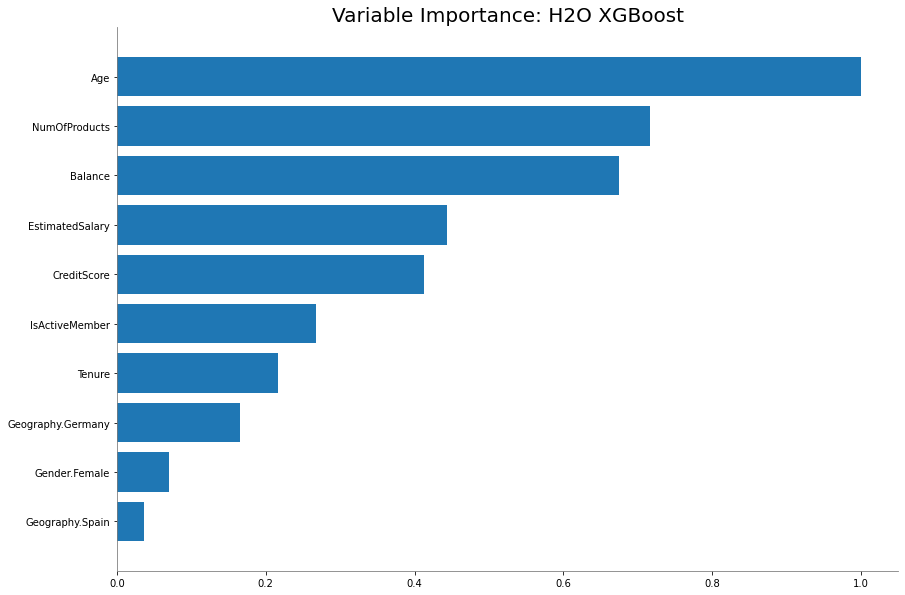

In [ ]:
out.varimp_plot()